In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 3

A.Forward propagation

In [ ]:
import numpy as np

# sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

# inputs
x1, x2 = 1.0, -1.0
inputs = np.array([x1, x2])

# weights
w13, w14 = 0.8, -0.7
w23, w24 = 1.3, -1.2
w35, w45 = 0.4, -0.4

# forward
z3 = w13 * x1 + w23 * x2
a3 = sigmoid(z3)

z4 = w14 * x1 + w24 * x2
a4 = sigmoid(z4)

y_hat = w35 * a3 + w45 * a4  # output layer
y = 1.0  # truth

print("Nodes:")
print(f"nodes = {a3:.4f}, node4 = {a4:.4f}, node5 = {y_hat:.4f}")



Nodes:
nodes = 0.3775, node4 = 0.6225, node5 = -0.0980


B. Backpropagation

In [ ]:

# loss function
loss = (y_hat - y) ** 2

# backprpropagation
dL_dyhat = 2 * (y_hat - y)       # dl/dyhat
dL_dw35 = dL_dyhat * a3          # dl/dw35
dL_dw45 = dL_dyhat * a4          # dl/dw45

# backpropagation
dL_dz3 = dL_dyhat * w35 * sigmoid_derivative(z3)
dL_dz4 = dL_dyhat * w45 * sigmoid_derivative(z4)

dL_dw13 = dL_dz3 * x1
dL_dw23 = dL_dz3 * x2
dL_dw14 = dL_dz4 * x1
dL_dw24 = dL_dz4 * x2

# learing rate adjustment
eta = 0.1
w13 -= eta * dL_dw13
w14 -= eta * dL_dw14
w23 -= eta * dL_dw23
w24 -= eta * dL_dw24
w35 -= eta * dL_dw35
w45 -= eta * dL_dw45

# results
print("Updated weights:")
print(f"w13 = {w13:.2f}, w14 = {w14:.2f}, w23 = {w23:.2f}, w24 = {w24:.2f}, w35 = {w35:.2f}, w45 = {w45:.2f}")
print(f"Output before update (ŷ): {y_hat:.4f}")
print(f"Loss: {loss:.4f}")


Updated weights:
w13 = 0.82, w14 = -0.72, w23 = 1.28, w24 = -1.18, w35 = 0.48, w45 = -0.26
Output before update (ŷ): -0.0980
Loss: 1.2055


# Question 4

In [ ]:
# inputs
x1, x2 = 1.0, -1.0
inputs = np.array([x1, x2])

# weights
w13, w14 = 0.1, 0.1
w23, w24 = 0.1, 0.1
w35, w45 = 0.1, 0.1

# forward
z3 = w13 * x1 + w23 * x2
a3 = sigmoid(z3)

z4 = w14 * x1 + w24 * x2
a4 = sigmoid(z4)

y_hat = w35 * a3 + w45 * a4  # output layer
y = 1.0  # truth

print("Nodes:")
print(f"nodes = {a3:.4f}, node4 = {a4:.4f}, node5 = {y_hat:.4f}")

Nodes:
nodes = 0.5000, node4 = 0.5000, node5 = 0.1000


In [ ]:
# loss function
loss = (y_hat - y) ** 2

# backprpropagation
dL_dyhat = 2 * (y_hat - y)       # dl/dyhat
dL_dw35 = dL_dyhat * a3          # dl/dw35
dL_dw45 = dL_dyhat * a4          # dl/dw45

# backpropagation
dL_dz3 = dL_dyhat * w35 * sigmoid_derivative(z3)
dL_dz4 = dL_dyhat * w45 * sigmoid_derivative(z4)

dL_dw13 = dL_dz3 * x1
dL_dw23 = dL_dz3 * x2
dL_dw14 = dL_dz4 * x1
dL_dw24 = dL_dz4 * x2

# learing rate adjustment
eta = 0.1
w13 -= eta * dL_dw13
w14 -= eta * dL_dw14
w23 -= eta * dL_dw23
w24 -= eta * dL_dw24
w35 -= eta * dL_dw35
w45 -= eta * dL_dw45

# results
print("Updated weights:")
print(f"w13 = {w13:.2f}, w14 = {w14:.2f}, w23 = {w23:.2f}, w24 = {w24:.2f}, w35 = {w35:.2f}, w45 = {w45:.2f}")
print(f"Output before update (ŷ): {y_hat:.4f}")
print(f"Loss: {loss:.4f}")

Updated weights:
w13 = 0.10, w14 = 0.10, w23 = 0.10, w24 = 0.10, w35 = 0.19, w45 = 0.19
Output before update (ŷ): 0.1000
Loss: 0.8100


# Question 5

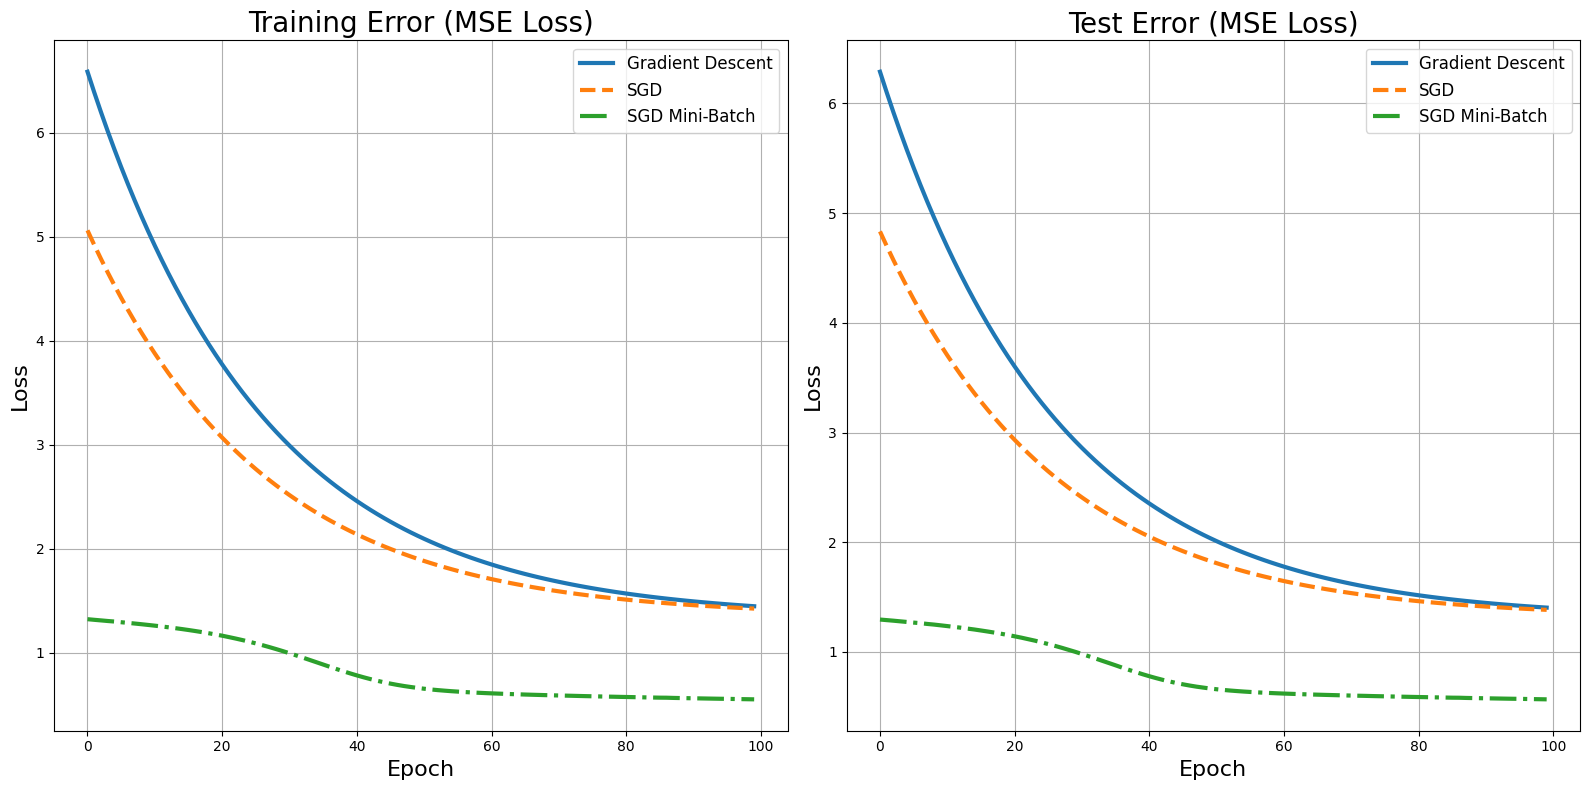

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# 1. Load the data
housing = fetch_california_housing()
X, y = housing.data, housing.target.reshape(-1, 1)


# 2. Split into train/test
#######################
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#######################

# 3. Fit scalers on train, transform both
#######################
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#######################

# 4. To tensors & datasets
#######################
X_train_tensor = torch.from_numpy(X_train_scaled).float()
y_train_tensor = torch.from_numpy(y_train).float()

X_test_tensor = torch.from_numpy(X_test_scaled).float()
y_test_tensor = torch.from_numpy(y_test).float()

# TensorDataset
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

#######################

# 5. Model factory
def get_model(n_in):
    return nn.Sequential(
      nn.Linear(n_in, 64), nn.Sigmoid(),
      nn.Linear(64, 32),   nn.Sigmoid(),
      nn.Linear(32, 1)
      )

# 6. Train and Test with Different Optimizer
#######################
def train_model(model, optimizer, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, dataset, epochs,
                use_minibatch=False, batch_size=10):
    criterion = torch.nn.MSELoss()
    losses = []
    losses_test = []

    if use_minibatch:
        # Create dataset and DataLoader for mini-batch updates.
        dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
        for epoch in range(epochs):
            for xb, yb in dataloader:
                optimizer.zero_grad()
                preds = model(xb)
                loss = criterion(preds, yb)
                loss.backward()
                optimizer.step()
            # Evaluate loss on the full dataset after each epoch.
            with torch.no_grad():
                preds_full = model(X_train_tensor)
                full_loss = criterion(preds_full, y_train_tensor)
                preds_test = model(X_test_tensor)
                test_loss = criterion(preds_test, y_test_tensor)
            losses.append(full_loss.item())
            losses_test.append(test_loss.item())
    else:
        # Full-batch update.
        for epoch in range(epochs):
            optimizer.zero_grad()
            preds = model(X_train_tensor)
            loss = criterion(preds, y_train_tensor)
            loss.backward()
            optimizer.step()
            preds_test = model(X_test_tensor)
            test_loss = criterion(preds_test, y_test_tensor)
            losses.append(loss.item())
            losses_test.append(test_loss.item())

    return losses, losses_test

def run_one_setup(epochs, n_in):
  errors = {}
  errors_test = {}

  # -------------------------------
  # 1. Gradient Descent (GD) - Full Batch
  # -------------------------------
  model = get_model(n_in)
  optimizer_gd = torch.optim.SGD(model.parameters(), lr=0.001)  # full batch
  errors['Gradient Descent'], errors_test['Gradient Descent'] = train_model(model, optimizer_gd, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, train_dataset, epochs, use_minibatch=False)

  # -------------------------------
  #2. Stochastic Gradient Descent (SGD)
  # -------------------------------
  model = get_model(n_in)
  optimizer_sgd = torch.optim.SGD(model.parameters(), lr=0.001)  # using mini-batches
  errors['Stochastic Gradient Descent'], errors_test['Stochastic Gradient Descent'] = train_model(model, optimizer_sgd, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, train_dataset, epochs, use_minibatch=False)

  # -------------------------------
  #3. Stochastic Gradient Descent (SGD) - Mini-batches
  # -------------------------------
  model = get_model(n_in)
  optimizer_sgd = torch.optim.SGD(model.parameters(), lr=0.001)  # using mini-batches
  errors['Stochastic Gradient Descent Mini Batch'], errors_test['Stochastic Gradient Descent Mini Batch'] = train_model(model, optimizer_sgd, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, train_dataset, epochs, use_minibatch=True, batch_size=64)



  return errors, errors_test
#######################

# -------------------------------
# Set Training Parameters
# -------------------------------
epochs = 100  # Number of training epochs
n_in = 8
errors, errors_test = run_one_setup(epochs, n_in)



# 7. Plot training/testing loss decay
#######################
# You implement
#######################
# -------------------------------
epochs_range = np.arange(epochs)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Left: Training loss
ax = axes[0]
ax.plot(epochs_range, errors['Gradient Descent'], label='Gradient Descent', linewidth=3)
ax.plot(epochs_range, errors['Stochastic Gradient Descent'], label='SGD', linestyle='--', linewidth=3)
ax.plot(epochs_range, errors['Stochastic Gradient Descent Mini Batch'],
        label='SGD Mini-Batch', linestyle='-.', linewidth=3)
ax.set_title('Training Error (MSE Loss)', fontsize=20)
ax.set_xlabel('Epoch', fontsize=16)
ax.set_ylabel('Loss', fontsize=16)
ax.legend(fontsize=12)
ax.grid(True)

# Right: Test loss
ax = axes[1]
ax.plot(epochs_range, errors_test['Gradient Descent'], label='Gradient Descent', linewidth=3)
ax.plot(epochs_range, errors_test['Stochastic Gradient Descent'], label='SGD', linestyle='--', linewidth=3)
ax.plot(epochs_range, errors_test['Stochastic Gradient Descent Mini Batch'],
        label='SGD Mini-Batch', linestyle='-.', linewidth=3)
ax.set_title('Test Error (MSE Loss)', fontsize=20)
ax.set_xlabel('Epoch', fontsize=16)
ax.set_ylabel('Loss', fontsize=16)
ax.legend(fontsize=12)
ax.grid(True)

plt.tight_layout()
plt.show()


Step 3: Define your own stopping criteria, and explain why it's reasonable.

I define a stopping criterion based on conditions that the training loss change remains below a small threshold for 3 epochs. This strategy ensures that training stops once the model stops generalizing better results. It balances performance and efficiency, prevents overfitting, and saves computational resources.

In [ ]:
def train_model_threshold(model, optimizer, X_train_tensor, y_train_tensor, dataset, epochs,
                use_minibatch=False, batch_size=64, threshold=1e-4, patience=3):
    criterion = torch.nn.MSELoss()
    losses = []
    best_loss = float('inf')
    no_improve_epochs = 0  # early stopping


    if use_minibatch:
        # Create dataset and DataLoader for mini-batch updates.
        dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
        for epoch in range(epochs):
            for xb, yb in dataloader:
                optimizer.zero_grad()
                preds = model(xb)
                loss = criterion(preds, yb)
                loss.backward()
                optimizer.step()
            # Evaluate loss on the full dataset after each epoch.
            with torch.no_grad():
                preds_full = model(X_train_tensor)
                full_loss = criterion(preds_full, y_train_tensor)
            losses.append(full_loss.item())
            # stop check
            if full_loss.item() < best_loss - threshold:
                best_loss = full_loss.item()
                no_improve_epochs = 0
            else:
                no_improve_epochs += 1

            if no_improve_epochs >= patience:
                print(f"Early stopping at epoch {epoch+1} (no improvement for {patience} epochs)")
                break

    else:
        # Full-batch update.
        for epoch in range(epochs):
            optimizer.zero_grad()
            preds = model(X_train_tensor)
            loss = criterion(preds, y_train_tensor)
            loss.backward()
            optimizer.step()
            losses.append(loss.item())
            # Early stopping 检查
            if loss.item() < best_loss - threshold:
                best_loss = loss.item()
                no_improve_epochs = 0
            else:
                no_improve_epochs += 1

            if no_improve_epochs >= patience:
                print(f"Early stopping at epoch {epoch+1} (no improvement for {patience} epochs)")
                break

    #return losses


def run_one_setup_threshold(epochs, n_in):

  # -------------------------------
  # 1. Gradient Descent (GD) - Full Batch
  # -------------------------------
  model = get_model(n_in)
  optimizer_gd = torch.optim.SGD(model.parameters(), lr=0.001)  # full batch
  print("Gradient Descent (GD):")
  train_model_threshold(model, optimizer_gd, X_train_tensor, y_train_tensor, train_dataset, epochs, use_minibatch=False, threshold=1e-4, patience=3)

  # -------------------------------
  #2. Stochastic Gradient Descent (SGD)
  # -------------------------------
  model = get_model(n_in)
  optimizer_sgd = torch.optim.SGD(model.parameters(), lr=0.001)
  print("Stochastic Gradient Descent (SGD):")
  train_model_threshold(model, optimizer_sgd, X_train_tensor, y_train_tensor, train_dataset, epochs, use_minibatch=False, batch_size=64, threshold=1e-4, patience=3)

  # -------------------------------
  #3. Stochastic Gradient Descent (SGD) - Mini-batches
  # -------------------------------
  model = get_model(n_in)
  optimizer_sgd = torch.optim.SGD(model.parameters(), lr=0.001)  # using mini-batches
  print("Stochastic Gradient Descent (SGD) - mini batch:")
  train_model_threshold(model, optimizer_sgd, X_train_tensor, y_train_tensor, train_dataset, epochs, use_minibatch=True, batch_size=64, threshold=1e-4, patience=3)

In [ ]:
run_one_setup_threshold(500, 8)

Gradient Descent (GD):
Early stopping at epoch 243 (no improvement for 3 epochs)
Stochastic Gradient Descent (SGD):
Early stopping at epoch 222 (no improvement for 3 epochs)
Stochastic Gradient Descent (SGD) - mini batch:
Early stopping at epoch 305 (no improvement for 3 epochs)


Step 4: Discuss convergence speed and the quality of the final solution. Which method(s) are preferable, and why?

As above graph displayed, mini-batch SGD converges fastest, reaching a low error early. SGD converges faster than GD at first and reduces MSE much more rapidly than GD. Mini-batch SGD reaches the lowest loss overall, indicating the best solution among the three. Gradient Descent converges slowly and to a higher error. Mini-batch SGD is most effective here because it combines the faster converge speed of SGD with the stability of GD.

# Question 6

100%|██████████| 9.91M/9.91M [00:01<00:00, 5.46MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 160kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.52MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.89MB/s]


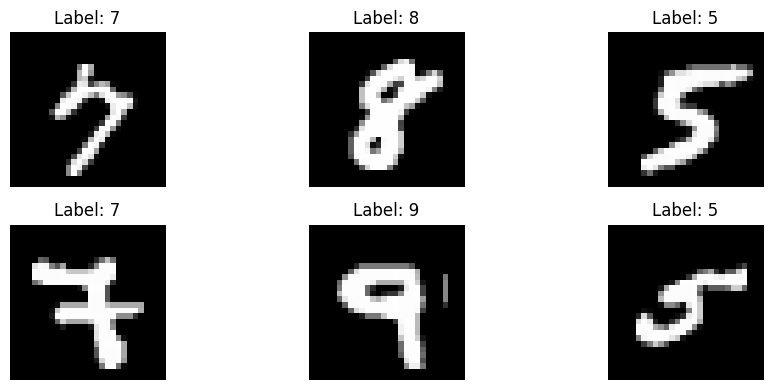

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------
# 1. Prepare Random Subsets
# -------------------------------
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

full_train = datasets.MNIST(root='./data', train=True,  download=True, transform=transform)
full_test  = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_subset, _ = random_split(full_train, [6000, len(full_train) - 6000])
test_subset,  _ = random_split(full_test,  [1000, len(full_test)  - 1000])

train_loader = DataLoader(train_subset, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_subset,  batch_size=1000, shuffle=False)

# -------------------------------
# 2. Model
# -------------------------------
class SimpleMLP(nn.Module):
    def __init__(self, hidden1=256, hidden2=128):
        super().__init__()
        self.fc1 = nn.Linear(28*28, hidden1)
        self.fc2 = nn.Linear(hidden1, hidden2)
        self.fc3 = nn.Linear(hidden2, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return self.fc3(x)

# -------------------------------
# 3. Training helpers, for example. You can implement your own as needed.
# -------------------------------
def train_epoch(model, device, loader, optimizer, criterion):
    model.train()
    running_loss = 0.0
    for xb, yb in loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        logits = model(xb)
        loss = criterion(logits, yb)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * xb.size(0)
    return running_loss / len(loader.dataset)

def eval_model(model, device, loader, criterion):
    model.eval()
    running_loss = 0.0
    correct = 0
    with torch.no_grad():
        for xb, yb in loader:
            xb, yb = xb.to(device), yb.to(device)
            logits = model(xb)
            running_loss += criterion(logits, yb).item() * xb.size(0)
            preds = logits.argmax(dim=1)
            correct += (preds == yb).sum().item()
    avg_loss = running_loss / len(loader.dataset)
    accuracy = correct / len(loader.dataset)
    return avg_loss, accuracy

# 4. Implementing optimizer, training, and analysis.
#######################
# Get a batch
examples = iter(DataLoader(train_subset, batch_size=64, shuffle=True))
example_data, example_targets = next(examples)

# Visualize
plt.figure(figsize=(10, 4))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(example_data[i][0], cmap='gray')
    plt.title(f"Label: {example_targets[i].item()}")
    plt.axis('off')
plt.tight_layout()
plt.show()


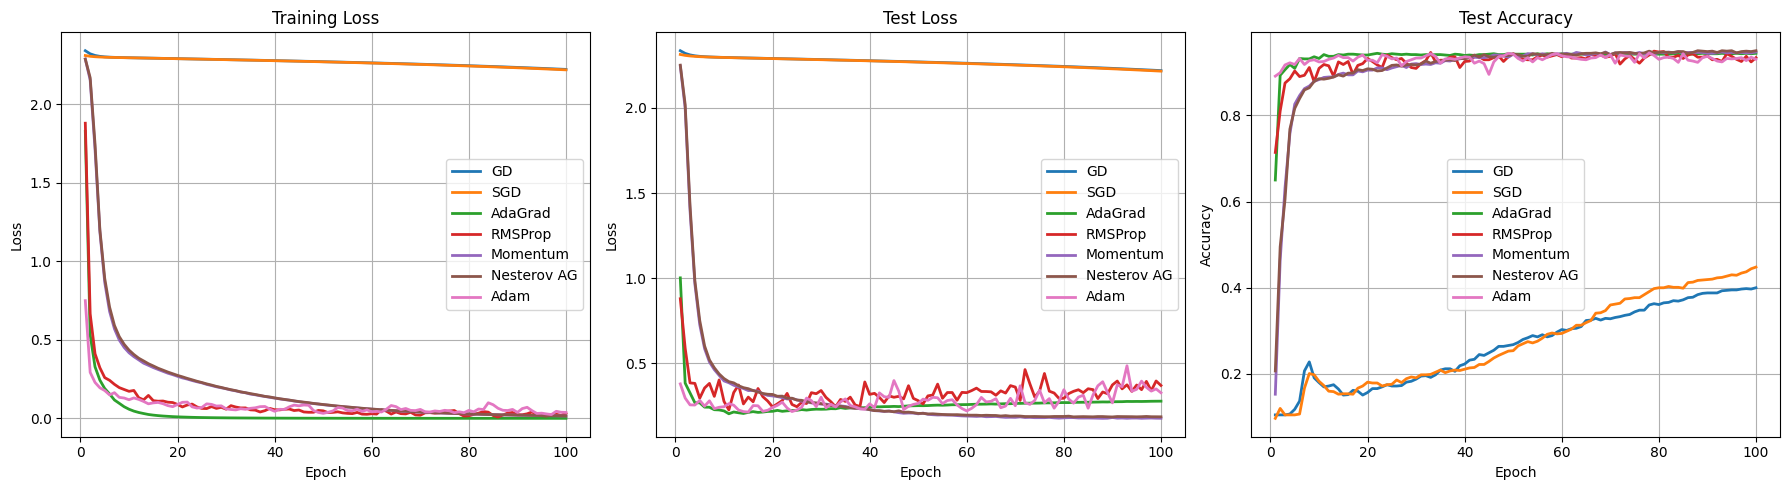

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------
# Training Function
# -------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
criterion = nn.CrossEntropyLoss()

num_epochs = 100

def make_optimizers(model):
    return {
        "GD":           torch.optim.SGD(model.parameters(), lr=0.001),
        "SGD":          torch.optim.SGD(model.parameters(), lr=0.001),
        "AdaGrad":      torch.optim.Adagrad(model.parameters(), lr=0.1),
        "RMSProp":      torch.optim.RMSprop(model.parameters(), lr=0.01),
        "Momentum":     torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9),
        "Nesterov AG":  torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9, nesterov=True),
        "Adam":         torch.optim.Adam(model.parameters(), lr=0.01)
    }


# 5. optimize and collect
results = {}
for name in make_optimizers(SimpleMLP()).keys():
    model = SimpleMLP().to(device)
    optimizer = make_optimizers(model)[name]

    train_losses = []
    test_losses  = []
    test_accs    = []

    for epoch in range(1, num_epochs+1):
        # one epoch
        tr_loss = train_epoch(model, device, train_loader, optimizer, criterion)
        # evaluation on test dataset
        te_loss, te_acc = eval_model(model, device, test_loader, criterion)

        train_losses.append(tr_loss)
        test_losses.append(te_loss)
        test_accs.append(te_acc)

        #print(f"[{name:9s}] Epoch {epoch:2d}/{num_epochs}  "
              #f"Train Loss={tr_loss:.4f}  Test Loss={te_loss:.4f}  Test Acc={te_acc:.4f}")

    results[name] = (train_losses, test_losses, test_accs)

# 6. plot：
epochs = np.arange(1, num_epochs+1)
plt.figure(figsize=(18,5))

# （1）training loss
plt.subplot(1,3,1)
for name, (tr, _, _) in results.items():
    plt.plot(epochs, tr, label=name, linewidth=2)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()

# （2) test loss
plt.subplot(1,3,2)
for name, (_, te, _) in results.items():
    plt.plot(epochs, te, label=name, linewidth=2)
plt.title("Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()

# （3）accuracy
plt.subplot(1,3,3)
for name, (_, _, acc) in results.items():
    plt.plot(epochs, acc, label=name, linewidth=2)
plt.title("Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()



Step 3:  Finally, include a short discussion on which optimizer(s) performed best and explain why.

AdaGrad performs best. For training loss, AdaGrad decreases to nearly zero in just a few epochs. For test loss, AdaGrad achieves the lowest test loss almost immediately. Addtionally, AdaGrad jump to around 90% accuracy within the first 10 epoch. AdaGrad automatically scale each parameter's learning rate based on the history of squared gradients, which speeds up the early descent by allowing larger steps in shallow directions and prevents larger steps in steep directions, letting them converge faster and generalize better.